<a href="https://colab.research.google.com/github/Dark-97o/Neural_Network_and_Deep_Learning/blob/main/optimisers_clothes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


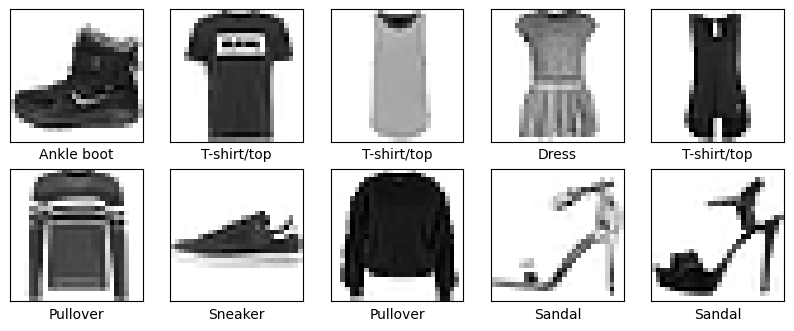

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6960 - loss: 0.8625
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7319 - loss: 0.7358
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7246 - loss: 0.7451
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7395 - loss: 0.7074
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7439 - loss: 0.7114
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7460 - loss: 0.6671
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7314 - loss: 0.7230
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7452 - loss: 0.6905
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7486 - loss: 0.6758
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7828 - loss: 0.6302
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7764 - loss: 0.6388
Epoch 2/10
1875/1875 ━━━━━━━━━━

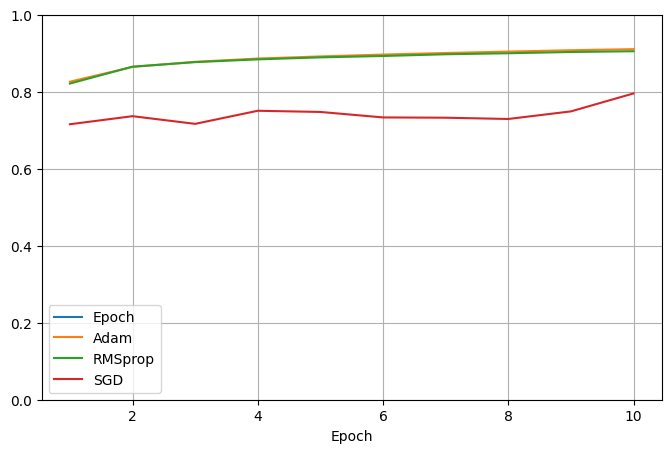

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8879 - loss: 0.3302
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8771 - loss: 0.4008
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8211 - loss: 0.5629
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8879 - loss: 0.3302


[0.3316629230976105, 0.8858000040054321]

In [1]:
# Compare the performance of SGD, Adam, and RMSprop on Fashion-MNIST:
#Import the libraries
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#importing the dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#Assigning class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#normalize the values
train_images = train_images / 255.0
test_images = test_images / 255.0
#plotting few sample values
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#Create the Models
modeladm = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
modelrmsprop = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

modelsgd = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
#Compile the Models
modeladm.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
modelrmsprop.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

modelsgd.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# Create an SGD optimizer with a learning rate and momentum
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
modelsgd.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#Fitting all The Models
#SGD
hist3=modelsgd.fit(train_images, train_labels, epochs=10)
#RMSProp
hist2=modelrmsprop.fit(train_images, train_labels, epochs=10)
#ADaM
hist1=modeladm.fit(train_images, train_labels, epochs=10)
#Plotting the accuracy over epochs
ep=np.arange(1,11,1)
acc1=hist1.history['accuracy']
acc2=hist2.history['accuracy']
acc3=hist3.history['accuracy']
list_of_tuples = list(zip(ep,acc1,acc2,acc3))
df = pd.DataFrame(list_of_tuples, columns = ['Epoch', 'Adam','RMSprop','SGD'])
#Plotting the accuracy over epochs
df.index = df['Epoch']
df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim([0, 1]) # set the vertical range to [0-1]
plt.show()
#Validating over test sets
modeladm.evaluate(test_images, test_labels)
modelrmsprop.evaluate(test_images, test_labels)
modelsgd.evaluate(test_images, test_labels)
#Continuing with the best model
modeladm.evaluate(test_images, test_labels)